## DAE_DSA

In [13]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [14]:
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam

df = pd.read_csv("C:/Users/user/Desktop/2024 2학기/딥러닝 응용/4주차/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [15]:
# 컬렴명 확인
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [16]:
y=df['activity']
y.value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [17]:
df_filtered = df[df['activity'].isin(['lyingRigh', 'lyingBack','standing'])]
df_filtered = df_filtered.drop('people', axis=1)
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,standing
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,standing
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,standing
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,standing
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,standing


In [18]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083,2
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917,2
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525,2
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492,2
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443,2


In [19]:
df_filtered['activity'].value_counts()

activity
2    480
0    480
1    480
Name: count, dtype: int64

In [46]:
LABELS = ["Normal", "Abnormal"]

In [47]:
normal = df_filtered[(df_filtered.activity == 1) | (df_filtered.activity == 0)]
abnormal = df_filtered[df_filtered.activity == 2]
normal.shape

(960, 271)

In [69]:
df_noised = df_filtered.copy()

noise_factor = np.random.uniform(0, 1)

# 선택한 열에 노이즈 추가
for column in columns_to_add_noise:
    df_noised[column] += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=df_noised[column].shape)

# 노이즈가 추가된 데이터 확인
df_noised

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
480,9.114811,9.675794,7.914750,-0.155856,-0.235406,1.840141,0.130548,0.757045,0.785850,0.081717,...,-0.207137,0.558518,-0.201950,0.495309,0.072978,0.855250,-0.488578,0.485282,-0.336998,2
481,7.790308,8.959124,8.063715,0.068779,-0.186285,0.511239,0.809397,0.186877,0.385170,-0.073478,...,0.589757,-0.596760,1.349146,0.705530,0.144338,1.139320,-0.411195,0.403417,-0.123249,2
482,8.783515,8.358975,8.732326,-0.001152,0.186776,-0.097109,0.781049,0.175479,-0.503652,-0.157580,...,-0.404944,0.648119,1.223051,0.530996,0.599297,0.623576,0.748804,-0.264890,-0.413155,2
483,7.601249,8.992894,8.932550,0.322230,0.935006,0.044888,0.750043,0.254657,0.631882,0.101840,...,-0.081083,-0.241927,0.251261,0.505673,1.136304,0.400209,-0.511834,0.778150,0.191031,2
484,8.786806,8.346356,8.025138,-0.339880,0.718416,-0.725888,0.602188,0.867621,0.855667,0.444081,...,-0.125419,0.379578,0.366963,0.960243,0.649504,0.605024,0.856327,0.407286,-1.227979,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.188916,2.432664,2.971904,-0.212414,0.582020,0.087952,-8.841968,-8.844844,-9.607664,-0.192741,...,0.785962,0.553117,0.022310,-0.049233,-0.601197,0.026221,-0.264909,-0.586610,-0.181351,1
1916,2.736790,2.939346,2.930609,-0.520454,0.039695,-0.157042,-9.743433,-9.347920,-9.210277,0.007546,...,-0.266940,0.158871,-0.204426,-0.588713,-0.177520,-0.309239,0.092642,-0.049345,0.286631,1
1917,2.497524,2.435788,2.292556,-0.639855,-0.234379,-0.253838,-10.040691,-9.711841,-9.815047,-0.577885,...,-0.857187,-0.638135,-0.319793,-0.633552,0.264569,-0.357115,0.164568,-0.065986,0.195876,1
1918,3.065103,3.187551,2.791015,0.503798,0.000988,-0.880148,-9.172920,-9.499064,-8.966228,-0.028593,...,-0.379576,-0.579943,1.619545,-0.027961,-0.344906,-0.352375,0.551796,0.066163,1.809360,1


In [49]:
# normal = df_filtered[(df_filtered.activity == 0)

normal = df_filtered[(df_noised.activity == 0)]

# activity가 1인 데이터를 선택
abnormal = df_filtered[df_noised.activity == 1]

# normal 데이터프레임의 모양 확인
normal.shape

(480, 271)

In [50]:
abnormal.shape

(480, 271)

In [51]:
# 노이즈가 낀 데이터와 노이즈가 없는 데이터

noisy_train = df_noised.drop(['activity'], axis=1)

pure_train = df_filtered.drop(['activity'], axis=1)

In [52]:
# 오토인코더 모델

input_dim = noisy_train.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim /2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_12 (Dense)            (None, 16)                4336      
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 270)               2430      
                                                                 
Total params: 6,974
Trainable params: 6,974
Non-trainable params: 0
_________________________________________________________________


In [53]:
# verbose 값이 0
autoencoder.fit(noisy_train, pure_train, epochs=100, batch_size=64, shuffle=True, verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 5.6712
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 5.5156
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 5.2063
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 4.9935
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 4.9258
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 4.8982
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 4.8839
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 4.8722
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 4.8634
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 4.8518
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 4.8410
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 4.8317
Epoch 13/100
23/23 [=================

In [54]:
from sklearn.model_selection import train_test_split

X_noisy_train, X_noisy_test = train_test_split(df_noised, test_size=0.25, random_state=20)

X_noisy_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
1010,-3.681185,-4.615722,-4.516427,-0.053926,0.121329,-0.599726,0.653445,0.474853,-1.830593,-0.390584,...,-0.634460,-0.099550,-0.572431,-1.028812,-0.942320,-1.056928,-0.667222,0.455338,0.741576,0
1467,2.791507,2.318994,2.346649,-0.075321,0.574727,0.245982,-8.096774,-6.569611,-8.378986,-1.045667,...,-0.918700,0.163699,-0.276171,0.064416,-0.201684,-0.906790,0.273905,0.389453,-0.127101,1
868,9.136396,8.426495,6.960642,0.571876,0.394175,0.132855,-1.621435,-0.440921,-2.736365,0.589273,...,-0.351477,0.346839,0.001928,-0.321338,-0.895239,-0.376849,0.035031,1.088378,-0.331876,2
486,7.867359,9.309394,8.266850,0.291415,0.574062,0.081105,0.018304,0.873748,0.032654,-0.052273,...,0.183079,-0.021534,-0.059109,0.504584,1.813044,1.458824,0.559097,0.005313,0.841678,2
850,8.248083,9.204890,7.589302,-0.384274,-0.121493,1.091329,-1.396674,-1.008028,-1.657242,-0.114464,...,0.041544,0.166037,-1.563942,0.276858,0.534775,-0.362117,-0.410217,-0.410527,0.709675,2


In [55]:
# normal feature만 가지는 X_train
# 0: normal, 1: abnormal
X_noisy_train = X_noisy_train[X_noisy_train.activity == 0]

y_train = X_noisy_train['activity']
y_test = X_noisy_test['activity']

X_noisy_train = X_noisy_train.drop(['activity'], axis=1)
X_noisy_test = X_noisy_test.drop(['activity'], axis=1)

X_noisy_train.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
1010,-3.681185,-4.615722,-4.516427,-0.053926,0.121329,-0.599726,0.653445,0.474853,-1.830593,-0.390584,...,0.885839,-0.634460,-0.099550,-0.572431,-1.028812,-0.942320,-1.056928,-0.667222,0.455338,0.741576
962,-5.186961,-4.727927,-4.527074,0.409554,-0.043807,1.585478,-0.758175,-1.179229,-1.090751,-0.386413,...,-0.124438,-0.167423,0.249341,-1.287067,-0.205007,-0.169240,-0.856859,-0.821368,-0.606157,1.045429
1174,-3.273483,-3.523706,-3.039234,0.557199,-0.492822,-1.143378,1.663639,1.787135,0.958931,1.128049,...,0.719282,-0.526547,-0.144329,-0.169968,-0.140419,-0.362253,-0.786690,0.112381,-0.585027,-0.072237
1327,-4.467951,-4.479481,-4.156919,-0.305748,0.696529,0.681272,1.381105,1.962690,0.923345,-0.853679,...,0.816816,-1.227170,-0.023559,-0.543222,-0.372835,-0.898625,0.378612,0.431876,1.197999,0.333634
1314,-5.360859,-4.675724,-4.712664,0.601025,0.550366,0.298731,0.189727,-1.065272,-0.148938,0.597765,...,0.500275,1.303656,-0.572745,-0.282785,-0.784905,0.022974,0.096061,-0.483643,-0.216068,-0.691260


In [56]:
X_noisy_train.shape, X_noisy_test.shape

((360, 270), (360, 270))

In [57]:
denoised_X_test = autoencoder.predict(X_noisy_test)

12/12 [==============================] - 0s 2ms/step


In [58]:
# denoised_X_test를 pandas DataFrame으로 변환
denoised_X_test = pd.DataFrame(denoised_X_test, columns=pure_train.columns) 
denoised_X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,1.609756e-05,4.901740e-04,1.263529e-05,1.650024e-15,1.099933e-06,6.115837e-13,2.303298e-17,7.511327e-20,2.976522e-11,3.233284e-11,...,0.195749,1.476389e-14,6.335171e-08,5.375804e-14,1.177625e-11,9.972750e-01,1.461783e-17,1.043325e-09,3.636363e-03,1.568672e-16
1,1.755220e-17,8.939391e-12,6.216935e-17,3.056121e-21,1.366072e-05,1.151339e-17,1.298883e-23,2.129606e-27,9.820808e-16,2.377711e-15,...,0.398999,8.910725e-23,1.786181e-11,4.638167e-18,7.486353e-09,2.518888e-05,1.356624e-32,4.355573e-12,1.185781e-05,3.132835e-28
2,4.073786e-09,2.233033e-10,7.308553e-09,6.794226e-22,4.811044e-06,3.332117e-18,3.289619e-25,5.594440e-26,3.106199e-15,2.444674e-14,...,0.293680,5.966112e-21,5.103141e-11,1.130859e-16,4.037230e-12,5.748731e-01,3.946451e-25,1.590638e-13,2.442372e-05,6.655088e-23
3,9.999987e-01,9.999996e-01,9.999989e-01,3.778858e-08,3.377039e-06,1.448667e-06,3.852125e-08,2.778773e-04,5.215500e-07,4.634404e-09,...,0.069560,2.141742e-08,7.263353e-06,1.560607e-03,1.953283e-06,3.514473e-01,3.203263e-01,2.140924e-06,1.804485e-05,3.601682e-04
4,9.999982e-01,9.999992e-01,9.999992e-01,6.398057e-09,2.735500e-06,4.122740e-07,1.050192e-08,1.469051e-04,4.380400e-08,5.217403e-09,...,0.251383,1.408435e-09,3.154082e-06,6.020816e-03,2.243770e-06,4.063767e-01,3.843313e-01,2.074896e-07,3.092080e-06,2.759426e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,7.681607e-06,8.448408e-04,5.519390e-06,3.519985e-16,3.476311e-07,1.806370e-13,3.416358e-18,6.052325e-21,7.619551e-12,5.884340e-12,...,0.123987,3.266763e-15,2.740379e-08,6.165456e-15,1.595966e-12,9.979203e-01,1.862899e-18,3.647317e-10,2.561345e-03,2.160919e-17
356,9.999642e-01,9.999906e-01,9.999533e-01,7.222948e-10,2.523770e-06,2.329993e-07,1.709443e-10,1.920636e-06,6.500635e-09,1.361443e-09,...,0.124117,4.915815e-10,6.982111e-07,3.643605e-04,2.200360e-07,2.401704e-02,4.488191e-03,5.541698e-08,9.374261e-07,2.217438e-05
357,3.353190e-21,9.993411e-01,7.636055e-18,3.921332e-13,6.465507e-08,5.397586e-10,1.056387e-12,3.196702e-17,1.356897e-19,2.440928e-14,...,0.534736,3.065903e-23,2.757302e-09,2.126695e-09,6.611466e-06,1.313568e-08,6.651132e-22,1.121506e-13,2.294604e-12,2.560546e-21
358,9.999997e-01,9.999999e-01,9.999999e-01,2.685649e-08,1.458154e-06,7.759006e-07,6.597406e-08,8.344392e-04,2.663454e-07,1.565900e-09,...,0.109231,5.909273e-09,4.392697e-06,4.840947e-03,3.737238e-06,6.247853e-01,5.879820e-01,1.269146e-06,1.116286e-05,3.332210e-04


In [59]:
pure_X = pure_train
pure_X.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
480,8.416815,8.5783,8.3103,0.002356,0.048537,0.867785,0.571528,0.73677,0.35819,0.004036,...,-0.040864,1.278649e-06,0.001131,0.243260,0.644246,0.64700,0.64109,0.000002,0.001313,-0.184083
481,8.439497,8.6153,8.1908,0.005754,0.075855,0.092156,0.499881,0.63267,0.32807,0.004515,...,-0.039709,2.816324e-06,0.001678,0.391596,0.643432,0.64789,0.63942,0.000003,0.001805,0.239917
482,8.442786,8.5184,8.3690,0.000786,0.028033,0.096127,0.429967,0.59482,0.32835,0.001260,...,-0.041693,1.760422e-06,0.001327,0.753549,0.643036,0.64646,0.64019,0.000002,0.001447,0.178525
483,8.444243,8.5480,8.3692,0.001558,0.039470,0.361301,0.414673,0.49073,0.33563,0.000867,...,-0.042093,1.218089e-05,0.003490,0.178568,0.643370,0.64657,0.64004,0.000003,0.001771,0.080492
484,8.347373,8.4138,8.2791,0.000774,0.027822,0.018596,0.441606,0.52153,0.37246,0.001067,...,-0.036785,8.834185e-07,0.000940,-0.237978,0.643874,0.64611,0.64063,0.000001,0.001219,-0.291443


In [60]:
pure_y = df_filtered['activity']
pure_y

480     2
481     2
482     2
483     2
484     2
       ..
1915    1
1916    1
1917    1
1918    1
1919    1
Name: activity, Length: 1440, dtype: int32

In [61]:
# 오토인코더 모델

input_dim = denoised_X_test.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim /2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_16 (Dense)            (None, 16)                4336      
                                                                 
 dense_17 (Dense)            (None, 8)                 136       
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 270)               2430      
                                                                 
Total params: 6,974
Trainable params: 6,974
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 모델 학습
history = autoencoder.fit(denoised_X_test, denoised_X_test, epochs=50, batch_size=256, shuffle=True, validation_split = 0.1)

Epoch 1/50
2/2 [==============================] - 1s 380ms/step - loss: 0.2372 - val_loss: 0.2359
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 0.2363 - val_loss: 0.2349
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.2353 - val_loss: 0.2337
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 0.2341 - val_loss: 0.2321
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2325 - val_loss: 0.2300
Epoch 6/50
2/2 [==============================] - 0s 41ms/step - loss: 0.2303 - val_loss: 0.2272
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.2276 - val_loss: 0.2238
Epoch 8/50
2/2 [==============================] - 0s 34ms/step - loss: 0.2242 - val_loss: 0.2196
Epoch 9/50
2/2 [==============================] - 0s 39ms/step - loss: 0.2201 - val_loss: 0.2146
Epoch 10/50
2/2 [==============================] - 0s 37ms/step - loss: 0.2152 - val_loss: 0.2088
Epoch 11/50
2/2 [===========

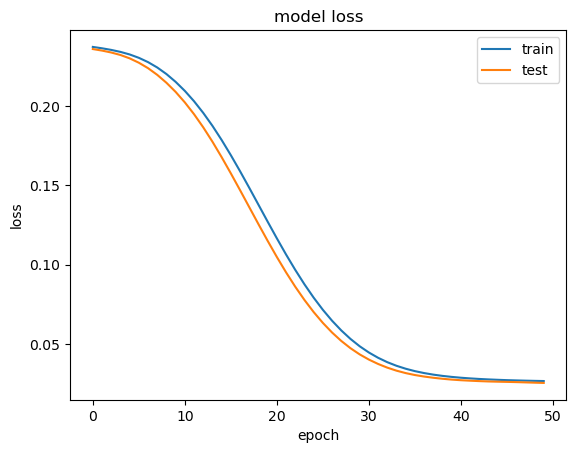

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [64]:
# X_noisy_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_noisy_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_noisy_test)
mse = np.mean(np.power(X_noisy_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

12/12 [==============================] - 0s 2ms/step


,reconstruction_error,true_class
count,360.000000,360.000000
mean,5.326084,1.022222
std,0.282707,0.830851
min,4.641636,0.000000
25%,5.132251,0.000000
50%,5.285324,1.000000
75%,5.482167,2.000000
max,6.346597,2.000000


In [65]:
error_df = error_df.reset_index(drop=True)
error_df

,reconstruction_error,true_class
0,5.228628,0
1,5.034554,0
2,5.377071,0
3,5.507878,2
4,5.313648,2
...,...,...
355,5.711905,0
356,5.296338,2
357,5.626254,1
358,5.210245,2


In [66]:
threshold = 1.284967	

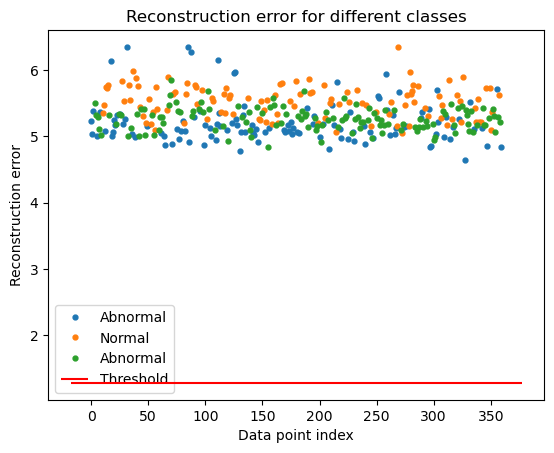

In [67]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Abnormal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

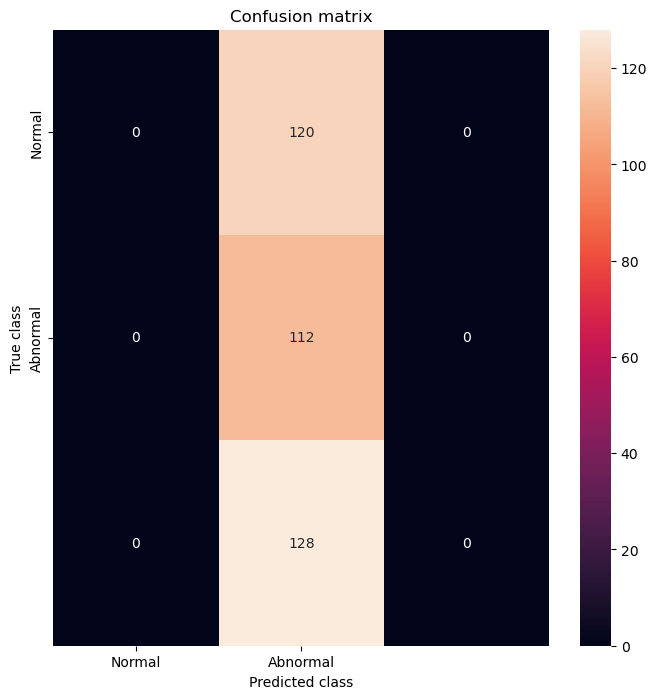

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.31      1.00      0.47       112
           2       0.00      0.00      0.00       128

    accuracy                           0.31       360
   macro avg       0.10      0.33      0.16       360
weighted avg       0.10      0.31      0.15       360



C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))